In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [6]:
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [7]:
df.shape

(96845, 8)

In [8]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [9]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [10]:
df.Year.value_counts()

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

In [11]:
df.State.value_counts()

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [12]:
df.Vehicle_Class.value_counts()

Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

In [13]:
df.Vehicle_Category.value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [14]:
df.Vehicle_Type.value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [15]:
df.drop(columns=['Year']).describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


# Checking for Duplicates and Missing Values

In [16]:
df.isna().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

# Checking if the Datatypes are correct or not

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [19]:
df['Year'] = df['Year'].astype(int)

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [21]:
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] = df[categorical_columns].astype('category')

In [22]:
df.Month_Name = df.Month_Name.str.capitalize()

In [23]:
df.EV_Sales_Quantity = df.EV_Sales_Quantity.astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [25]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,Jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,Jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,Jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,Jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,Jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0


# EDA

In [26]:
df.index.name = "Id"
df.index = df.index+1

In [27]:
def unique_value_checking(df_column):
    print("List of unique values : " ,df_column.unique())
    print("No of unique values : ", len(df_column.unique()))

In [28]:
unique_value_checking(df.Year)

List of unique values :  [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
No of unique values :  11


In [29]:
unique_value_checking(df.Month_Name)

List of unique values :  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
No of unique values :  12


In [30]:
unique_value_checking(df.Date)

List of unique values :  <DatetimeArray>
['2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00',
 '2017-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00',
 '2023-01-01 00:00:00',
 ...
 '2014-12-01 00:00:00', '2015-12-01 00:00:00', '2016-12-01 00:00:00',
 '2017-12-01 00:00:00', '2018-12-01 00:00:00', '2019-12-01 00:00:00',
 '2020-12-01 00:00:00', '2021-12-01 00:00:00', '2022-12-01 00:00:00',
 '2023-12-01 00:00:00']
Length: 121, dtype: datetime64[ns]
No of unique values :  121


In [31]:
unique_value_checking(df.State)

List of unique values :  ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Andaman & Nicobar Island', 'Bihar', ..., 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', 'Jammu and Kashmir', 'Manipur']
Length: 34
Categories (34, object): ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
No of unique values :  34


In [32]:
unique_value_checking(df.Vehicle_Class)

List of unique values :  ['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE', 'ARTICULATED VEHICLE', 'BUS', ..., 'SEMI-TRAILER (COMMERCIAL)', 'ARMOURED/SPECIALISED VEHICLE', 'MOTOR CYCLE/SCOOTER-WITH TRAILER', 'MODULAR HYDRAULIC TRAILER', 'MOTOR CARAVAN']
Length: 73
Categories (73, object): ['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE', 'ANIMAL AMBULANCE', ..., 'VEHICLE FITTED WITH COMPRESSOR', 'VEHICLE FITTED WITH GENERATOR', 'VEHICLE FITTED WITH RIG', 'X-RAY VAN']
No of unique values :  73


In [33]:
unique_value_checking(df.Vehicle_Category)

List of unique values :  ['Others', 'Bus', '2-Wheelers', '4-Wheelers', '3-Wheelers']
Categories (5, object): ['2-Wheelers', '3-Wheelers', '4-Wheelers', 'Bus', 'Others']
No of unique values :  5


In [34]:
unique_value_checking(df.Vehicle_Type)

List of unique values :  ['Others', 'Bus', 'Institution Bus', '2W_Personal', '4W_Shared', ..., '3W_Personal', '3W_Goods', '2W_Shared', '3W_Shared_LowSpeed', '3W_Goods_LowSpeed']
Length: 12
Categories (12, object): ['2W_Personal', '2W_Shared', '3W_Goods', '3W_Goods_LowSpeed', ..., '4W_Shared', 'Bus', 'Institution Bus', 'Others']
No of unique values :  12


In [35]:
unique_value_checking(df.EV_Sales_Quantity)

List of unique values :  [   0    1   10 ... 1840 2005 5380]
No of unique values :  1447


In [36]:
unique_columns_counts = []
for i in df.columns:
    unique_columns_counts.append(len(df[i].unique()))

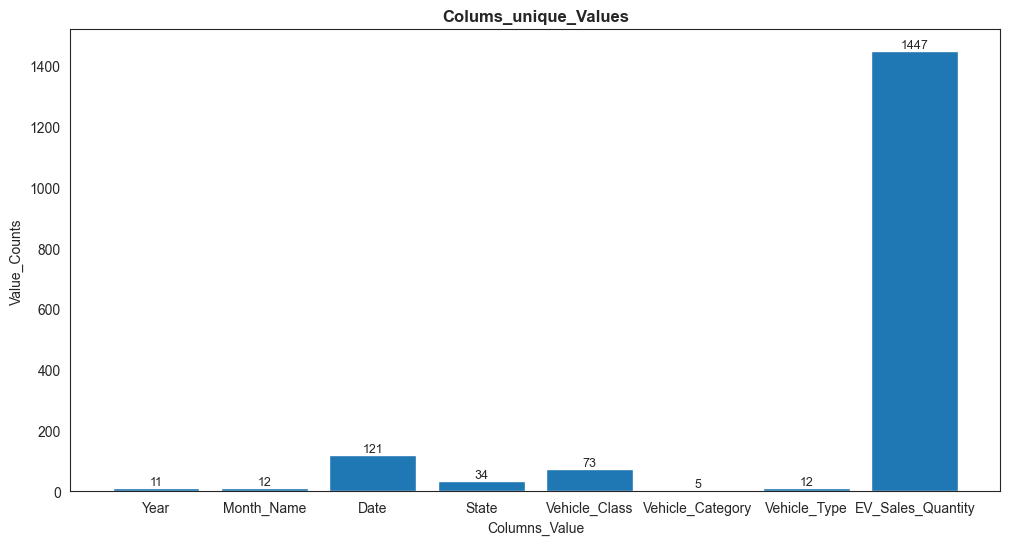

In [37]:
plt.figure(figsize = (12,6))
sns.set_style("white")
bars = plt.bar(df.columns,unique_columns_counts)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.title("Colums_unique_Values", fontweight = "bold")
plt.xlabel("Columns_Value")
plt.ylabel("Value_Counts")
plt.show()

# Removing unnecessary data

In [38]:
list_of_row_deletion = df.EV_Sales_Quantity[df.EV_Sales_Quantity == 0].index
EDA_df_filtered = df.drop(list_of_row_deletion)

In [39]:
def reset_index(df):
    df = df.reset_index(drop = True)
    df.index = df.index+1
    df.index.name = "Id"
    return df

In [40]:
for col in EDA_df_filtered.select_dtypes(include='category').columns:
    EDA_df_filtered[col] = EDA_df_filtered[col].cat.remove_unused_categories()

In [41]:
EDA_df_filtered = reset_index(EDA_df_filtered)

In [42]:
EDA_df_filtered.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Id,,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1
2,2014,Jan,2014-01-01,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10
3,2014,Jan,2014-01-01,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2
4,2014,Jan,2014-01-01,Delhi,MOTOR CAR,4-Wheelers,4W_Personal,5
5,2014,Jan,2014-01-01,Goa,MOTOR CAR,4-Wheelers,4W_Personal,1


In [43]:
df = EDA_df_filtered.copy()

In [44]:
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].cat.remove_unused_categories()

In [45]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Id,,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1
2,2014,Jan,2014-01-01,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10
3,2014,Jan,2014-01-01,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2
4,2014,Jan,2014-01-01,Delhi,MOTOR CAR,4-Wheelers,4W_Personal,5
5,2014,Jan,2014-01-01,Goa,MOTOR CAR,4-Wheelers,4W_Personal,1


# Visualising Trends 

In [46]:
df.EV_Sales_Quantity.sum()

np.int64(3593811)

In [47]:
year_wise_sold = df[["Year","EV_Sales_Quantity"]].groupby(by = "Year").sum()
print(year_wise_sold)

      EV_Sales_Quantity
Year                   
2014               2392
2015               7805
2016              49855
2017              87420
2018             130254
2019             166819
2020             124684
2021             331498
2022            1024723
2023            1525179
2024             143182


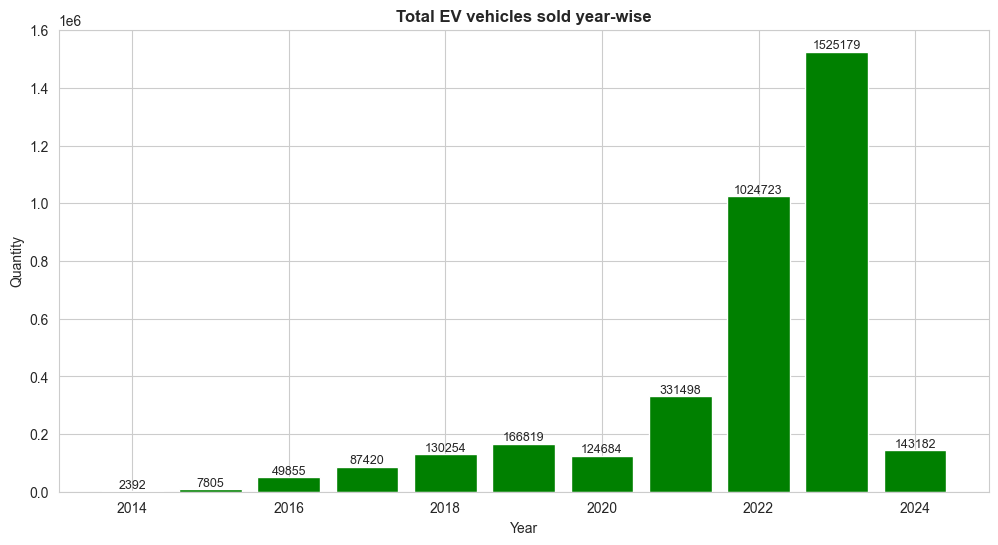

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = plt.bar(year_wise_sold.index,year_wise_sold.EV_Sales_Quantity, color = "green")
plt.title("Total EV vehicles sold year-wise", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Quantity")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.show()

In [49]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_wise_sold = df[["Month_Name", "EV_Sales_Quantity"]].groupby(by="Month_Name").sum()

month_wise_sold = month_wise_sold.reindex(month_order)

print(month_wise_sold)

            EV_Sales_Quantity
Month_Name                   
Jan                    360703
Feb                    228739
Mar                    299888
Apr                    232194
May                    262747
Jun                    229754
Jul                    270473
Aug                    294022
Sep                    313433
Oct                    355083
Nov                    382217
Dec                    364558


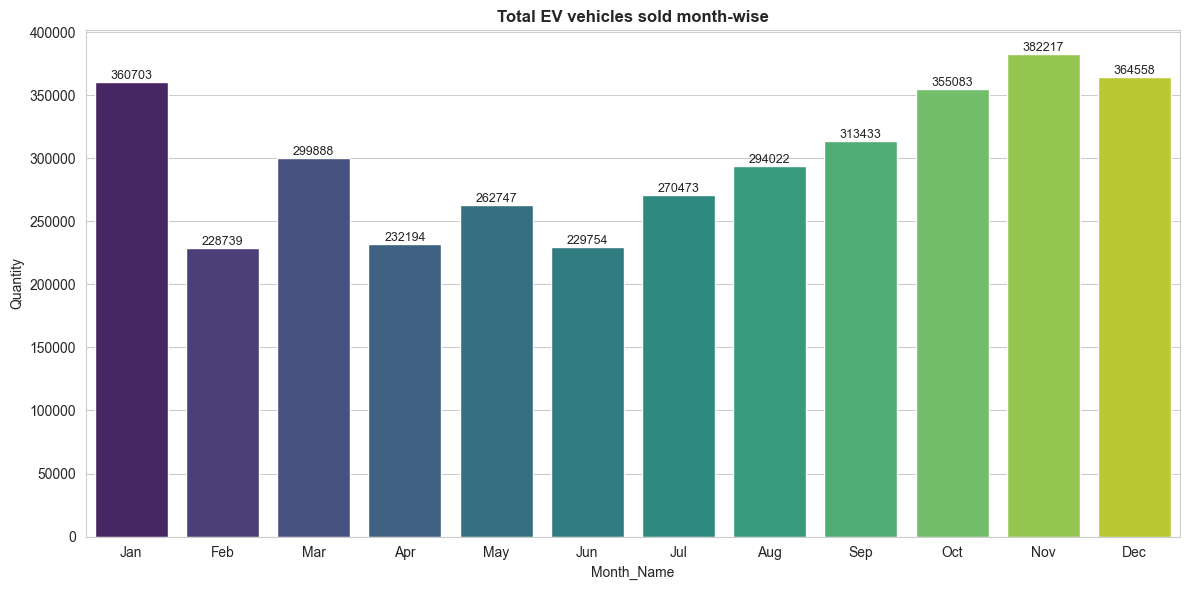

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = sns.barplot(x = month_wise_sold.index,y = month_wise_sold.EV_Sales_Quantity, data = month_wise_sold, palette = "viridis" )
plt.title("Total EV vehicles sold month-wise", fontweight = 'bold')
plt.xlabel("Month_Name")
plt.ylabel("Quantity")
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.0f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.show()

In [51]:
date_wise_sold = df[["Date","EV_Sales_Quantity"]].groupby("Date").sum()
print(date_wise_sold)

            EV_Sales_Quantity
Date                         
2014-01-01                232
2014-02-01                171
2014-03-01                220
2014-04-01                252
2014-05-01                186
...                       ...
2023-09-01             127793
2023-10-01             139232
2023-11-01             152610
2023-12-01             141033
2024-01-01             143182

[121 rows x 1 columns]


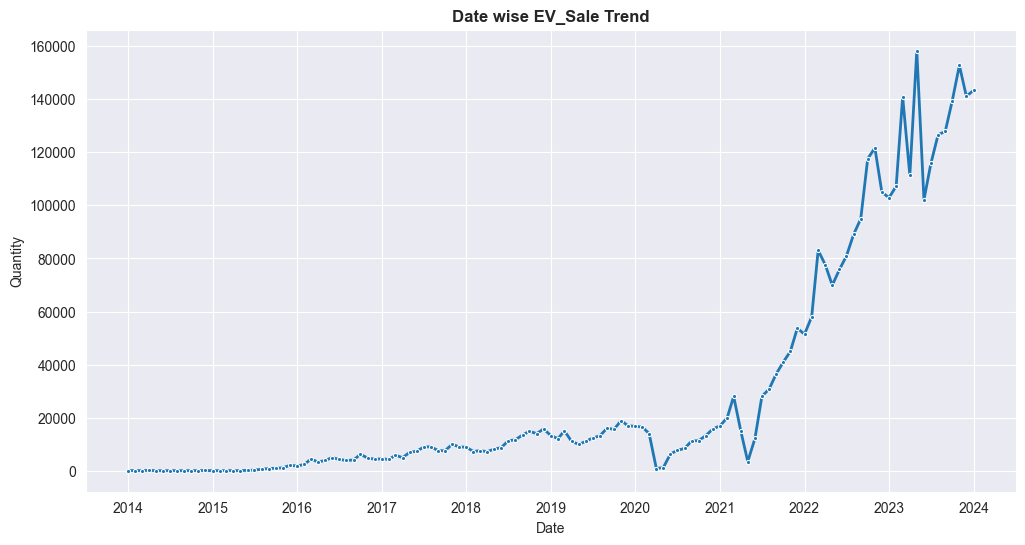

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.lineplot(x = date_wise_sold.index, y = date_wise_sold.EV_Sales_Quantity, data = date_wise_sold, marker = ".", linewidth = 2)
plt.title("Date wise EV_Sale Trend", fontweight = 'bold')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.grid (True)
plt.show()

In [53]:
State_wise_sold = df[["State","EV_Sales_Quantity"]].groupby("State").sum().sort_values("EV_Sales_Quantity", ascending = False)
print(State_wise_sold)

                          EV_Sales_Quantity
State                                      
Uttar Pradesh                        732074
Maharashtra                          401535
Karnataka                            315498
Delhi                                268538
Rajasthan                            228573
Bihar                                213465
Tamil Nadu                           206902
Gujarat                              176713
Assam                                151917
Kerala                               133246
Madhya Pradesh                       133182
Odisha                                86823
Haryana                               85250
West Bengal                           78112
Andhra Pradesh                        77356
Chhattisgarh                          75275
Uttarakhand                           57606
Punjab                                49285
Jharkhand                             47871
Tripura                               18346
Goa                             

In [54]:
print(State_wise_sold.index)

CategoricalIndex(['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Delhi',
                  'Rajasthan', 'Bihar', 'Tamil Nadu', 'Gujarat', 'Assam',
                  'Kerala', 'Madhya Pradesh', 'Odisha', 'Haryana',
                  'West Bengal', 'Andhra Pradesh', 'Chhattisgarh',
                  'Uttarakhand', 'Punjab', 'Jharkhand', 'Tripura', 'Goa',
                  'Jammu and Kashmir', 'Chandigarh', 'Puducherry',
                  'Himachal Pradesh', 'Manipur', 'DNH and DD', 'Mizoram',
                  'Meghalaya', 'Andaman & Nicobar Island', 'Ladakh',
                  'Nagaland', 'Arunachal Pradesh', 'Sikkim'],
                 categories=['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], ordered=False, dtype='category', name='State')


In [55]:
print(State_wise_sold.columns)

Index(['EV_Sales_Quantity'], dtype='object')


In [56]:
print(State_wise_sold.dtypes)

EV_Sales_Quantity    int64
dtype: object


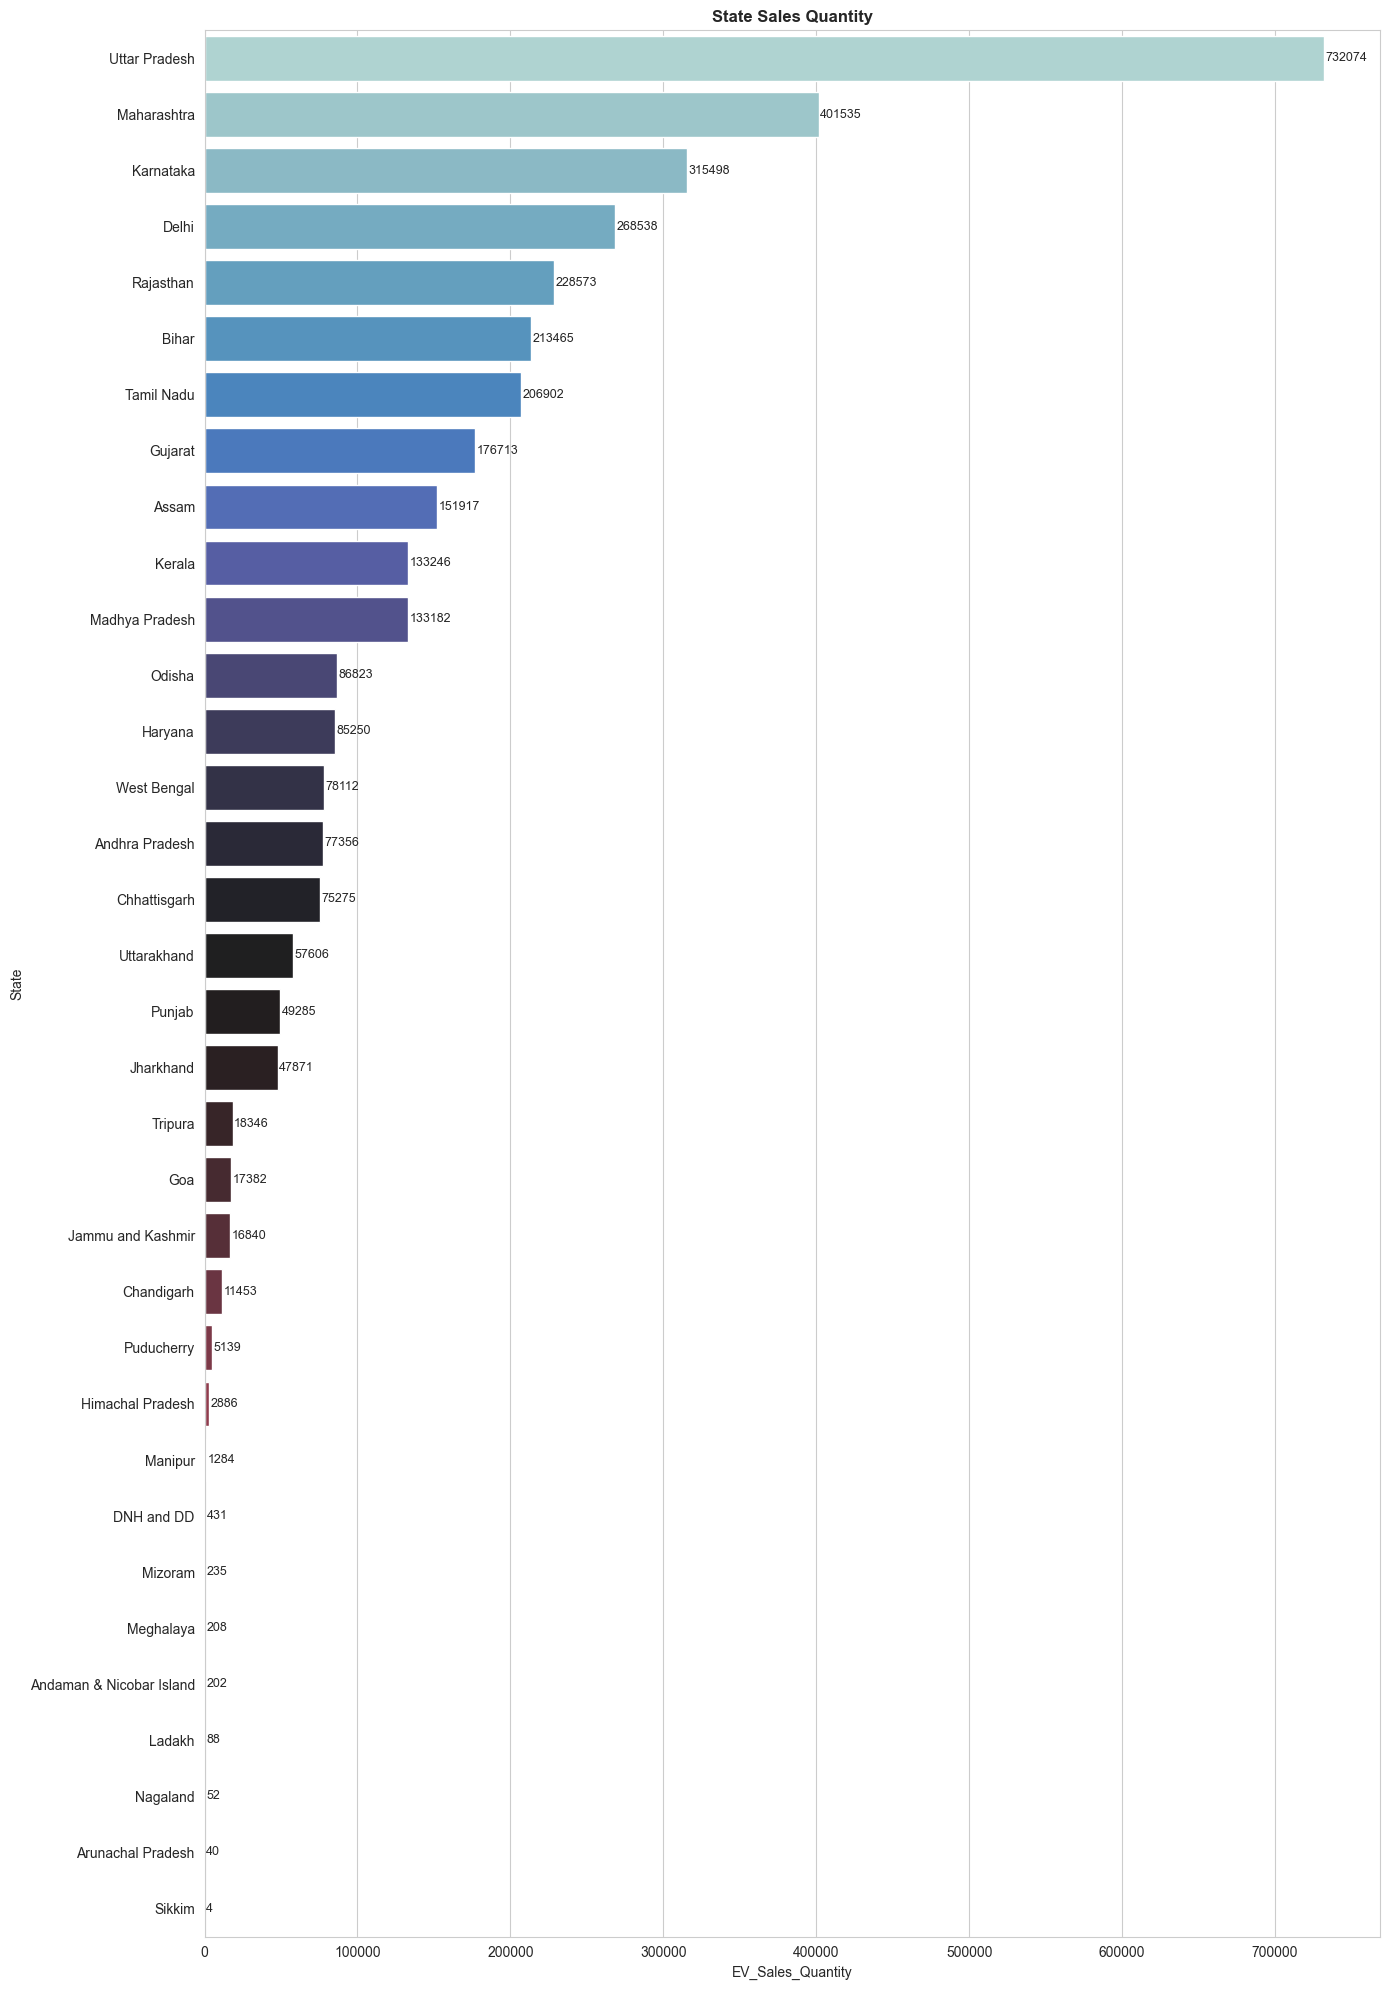

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Flatten the index
State_wise_sold_df = State_wise_sold.reset_index()

# Step 2: Ensure the 'State' column is treated as string, not category
State_wise_sold_df['State'] = State_wise_sold_df['State'].astype(str)

# Step 3: Sort the data
State_wise_sold_df = State_wise_sold_df.sort_values(by='EV_Sales_Quantity', ascending=False)

# Step 4: Plot
sns.set_style("whitegrid")
plt.figure(figsize=(14, 20))

bars = sns.barplot(
    data=State_wise_sold_df,
    x='EV_Sales_Quantity',
    y='State',
    palette='icefire',
    orient='h'
)

plt.title("State Sales Quantity", fontweight="bold")

# Step 5: Annotate values
for index, row in State_wise_sold_df.iterrows():
    plt.text(
        row['EV_Sales_Quantity'] + 1000,
        index,
        str(row['EV_Sales_Quantity']),
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [164]:
Vehicle_Class_wise_sold = df[["Vehicle_Class","EV_Sales_Quantity"]].groupby("Vehicle_Class").sum().sort_values("EV_Sales_Quantity", ascending = False)
print(Vehicle_Class_wise_sold)

                                          EV_Sales_Quantity
Vehicle_Class                                              
M-CYCLE/SCOOTER                                     1697373
E-RICKSHAW(P)                                       1408127
MOTOR CAR                                            130676
E-RICKSHAW WITH CART (G)                              90656
THREE WHEELER (PASSENGER)                             76132
MOPED                                                 61253
THREE WHEELER (GOODS)                                 44974
MOTORISED CYCLE (CC > 25CC)                           36390
MOTOR CAB                                             18681
MOTOR CYCLE/SCOOTER-USED FOR HIRE                     11765
BUS                                                    6891
GOODS CARRIER                                          6322
M-CYCLE/SCOOTER-WITH SIDE CAR                          1324
TRAILER (COMMERCIAL)                                    565
CONSTRUCTION EQUIPMENT VEHICLE          

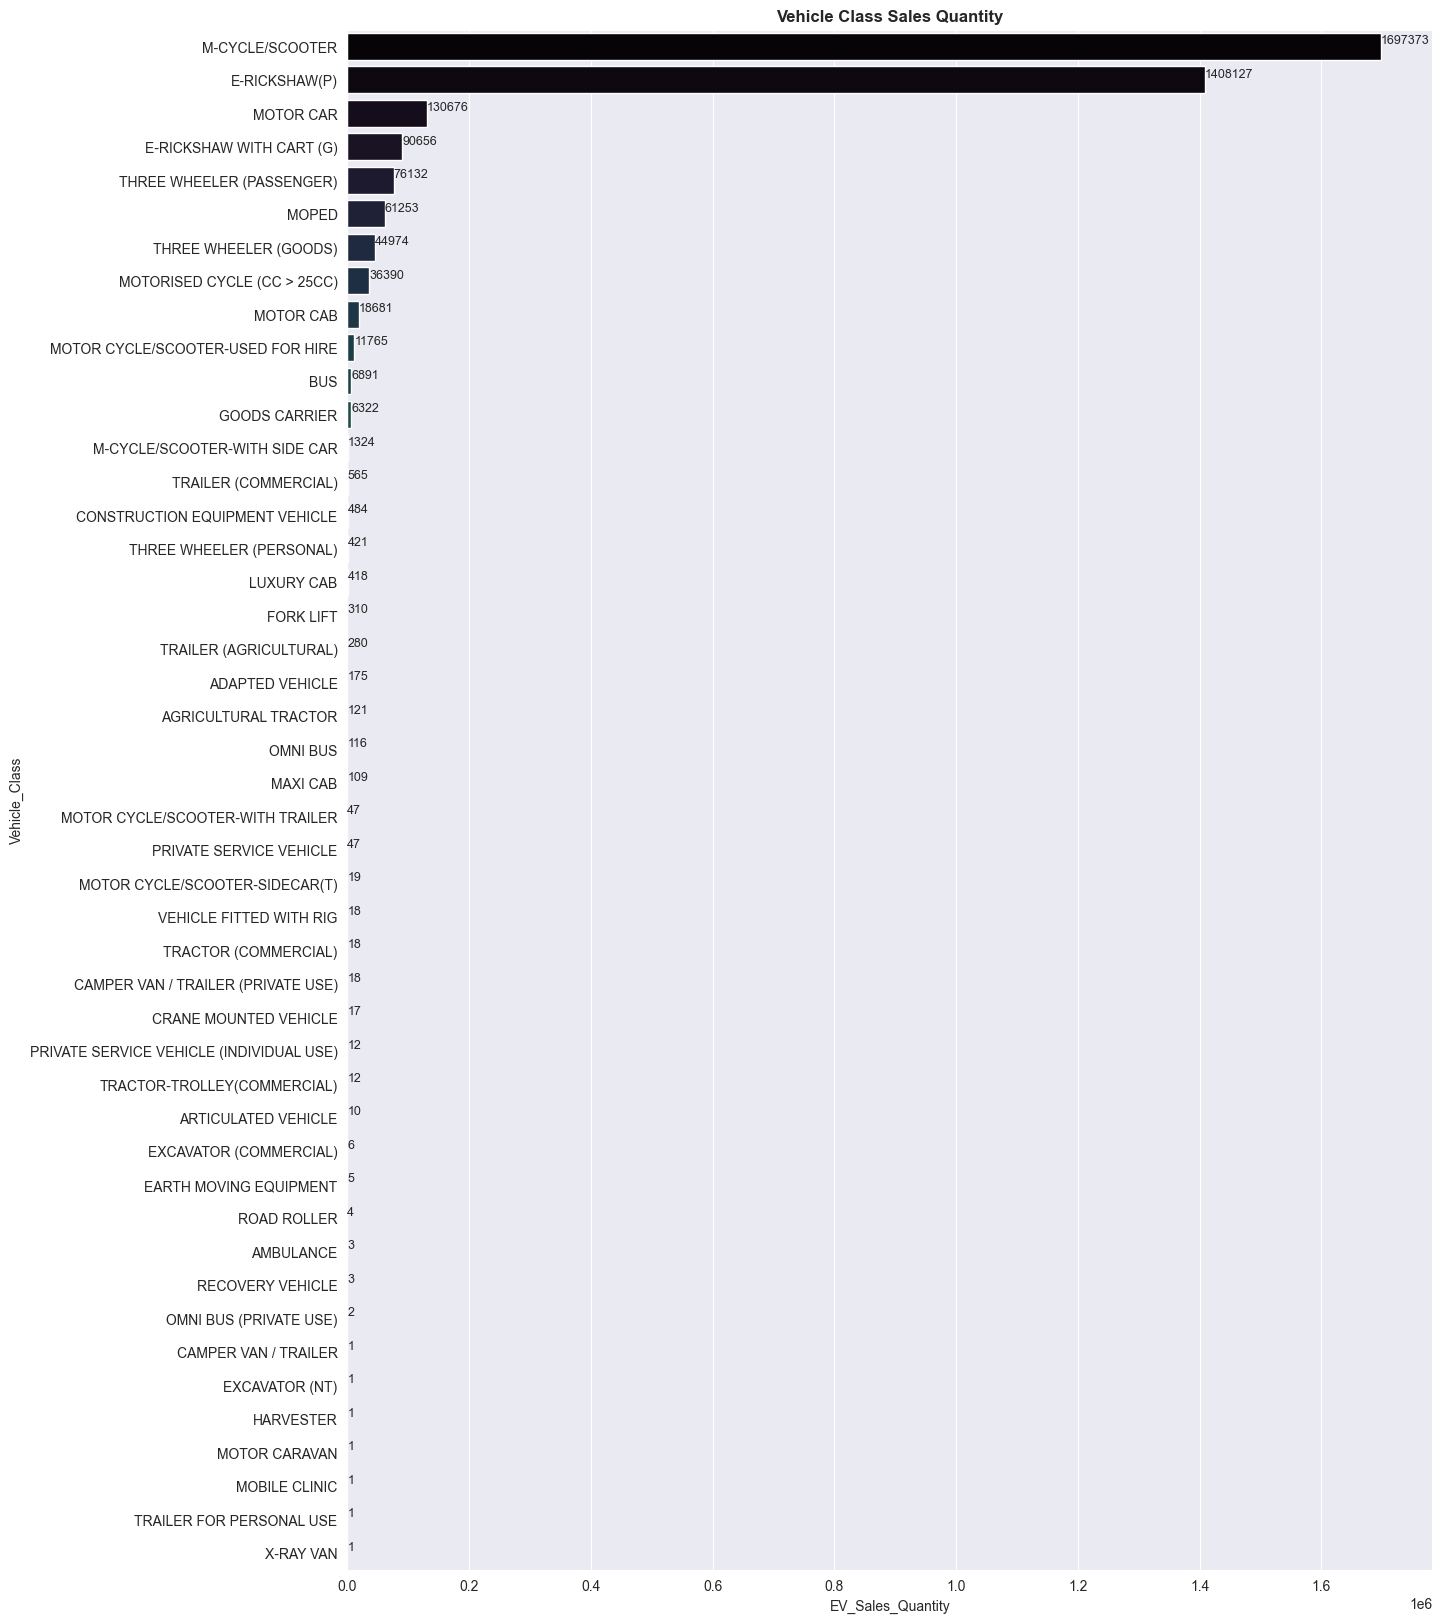

In [173]:
plot_df = Vehicle_Class_wise_sold.reset_index()
plot_df["Vehicle_Class"] = plot_df["Vehicle_Class"].astype(str)  

sns.set_style("darkgrid")
plt.figure(figsize=(14, 20))
bars = sns.barplot(
    x="EV_Sales_Quantity", 
    y="Vehicle_Class", 
    data=plot_df, 
    orient="h", 
    palette="cubehelix"
)
plt.title("Vehicle Class Sales Quantity", fontweight="bold")
for index, value in enumerate(plot_df['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)
plt.show()


In [174]:
Vehicle_Category_wise_sold = df[["Vehicle_Category","EV_Sales_Quantity"]].groupby("Vehicle_Category").sum()
print(Vehicle_Category_wise_sold)

                  EV_Sales_Quantity
Vehicle_Category                   
2-Wheelers                  1808105
3-Wheelers                  1620310
4-Wheelers                   149775
Bus                            7009
Others                         8612


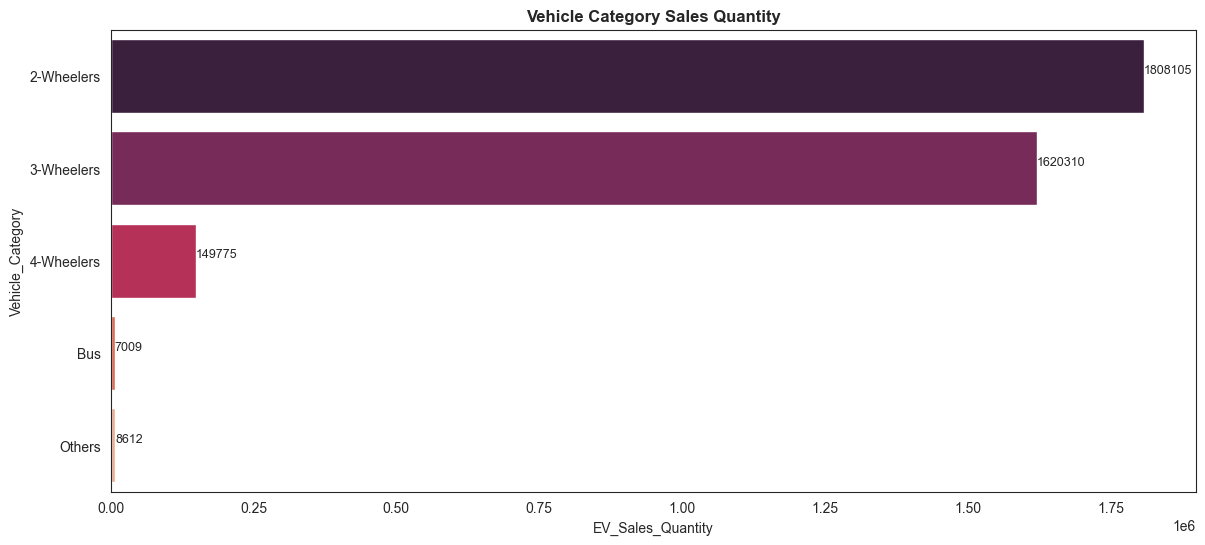

In [176]:
plot_df = Vehicle_Category_wise_sold.reset_index()
plot_df["Vehicle_Category"] = plot_df["Vehicle_Category"].astype(str) 

sns.set_style("white")
plt.figure(figsize = (14,6))
bars = sns.barplot(
    x="EV_Sales_Quantity", 
    y="Vehicle_Category", 
    data=plot_df, 
    orient="h", 
    palette="rocket"
)
plt.title("Vehicle Category Sales Quantity", fontweight="bold")
for index, value in enumerate(plot_df['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)
plt.show()


# Data for Forecasting

In [177]:
forecast_df = df[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df.Year = pd.to_datetime(forecast_df.Year, format = "%Y")
forecast_df = forecast_df.rename(columns={"Year" : "ds", "EV_Sales_Quantity" : "y"})
forecast_df

,ds,y
0,2014-01-01,2392
1,2015-01-01,7805
2,2016-01-01,49855
3,2017-01-01,87420
4,2018-01-01,130254
5,2019-01-01,166819
6,2020-01-01,124684
7,2021-01-01,331498
8,2022-01-01,1024723
9,2023-01-01,1525179


In [178]:
EDA_df = df.drop(columns = "Vehicle_Type")

# Feature Engineering

In [209]:
# One-hot encode and add to original df
month_dummies = pd.get_dummies(df['Month_Name'], prefix='Month')
df = pd.concat([df, month_dummies], axis=1)


In [216]:
df = EDA_df_filtered.copy()

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14062 entries, 1 to 14062
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               14062 non-null  int64         
 1   Month_Name         14062 non-null  object        
 2   Date               14062 non-null  datetime64[ns]
 3   State              14062 non-null  category      
 4   Vehicle_Class      14062 non-null  category      
 5   Vehicle_Category   14062 non-null  category      
 6   Vehicle_Type       14062 non-null  category      
 7   EV_Sales_Quantity  14062 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(2), object(1)
memory usage: 497.8+ KB


In [218]:
# Define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert to ordered categorical
df['Month_Name'] = pd.Categorical(df['Month_Name'],
                                   categories=month_order,
                                   ordered=True)


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14062 entries, 1 to 14062
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               14062 non-null  int64         
 1   Month_Name         14062 non-null  category      
 2   Date               14062 non-null  datetime64[ns]
 3   State              14062 non-null  category      
 4   Vehicle_Class      14062 non-null  category      
 5   Vehicle_Category   14062 non-null  category      
 6   Vehicle_Type       14062 non-null  category      
 7   EV_Sales_Quantity  14062 non-null  int64         
dtypes: category(5), datetime64[ns](1), int64(2)
memory usage: 402.1 KB


In [220]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Month_Name","State", "Vehicle_Category", "Vehicle_Type"])

# Label Encoding
le = LabelEncoder()
df_encoded["Vehicle_Class_Encoded"] = le.fit_transform(df["Vehicle_Class"])

# (Optional) Drop the original Vehicle_Class if you no longer need it
df_encoded = df_encoded.drop("Vehicle_Class", axis=1)

print(df_encoded.head())

    Year       Date  EV_Sales_Quantity  Month_Name_Jan  Month_Name_Feb  \
Id                                                                       
1   2014 2014-01-01                  1            True           False   
2   2014 2014-01-01                 10            True           False   
3   2014 2014-01-01                  2            True           False   
4   2014 2014-01-01                  5            True           False   
5   2014 2014-01-01                  1            True           False   

    Month_Name_Mar  Month_Name_Apr  Month_Name_May  Month_Name_Jun  \
Id                                                                   
1            False           False           False           False   
2            False           False           False           False   
3            False           False           False           False   
4            False           False           False           False   
5            False           False           False           

Column	                                Value                                       Meaning ||
Year	                                2014	                                 Year of sale ||
Month_Name	                            Jan	                                        January ||
EV_Sales_Quantity	                     1	                                   One vehicle sold ||
Day	                                     1	                                   1st of the month ||
Week	                                 1	                                  First week of year ||
Quarter	                                 1	                                     First quarter ||
Is_Weekend	                            False	                         2014-01-01 was not a weekend ||
State_Andhra Pradesh	                True	                           Sale was in Andhra Pradesh || 
Vehicle_Type_4W_Personal	            False	                       This row is not a 4W personal type ||
Vehicle_Class_Encoded	                18	                               M-CYCLE/SCOOTER or similar

In [221]:
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.isocalendar().week
df["Quarter"] = df["Date"].dt.quarter
df["Is_Weekend"] = df["Date"].dt.dayofweek >= 5  # Saturday=5, Sunday=6

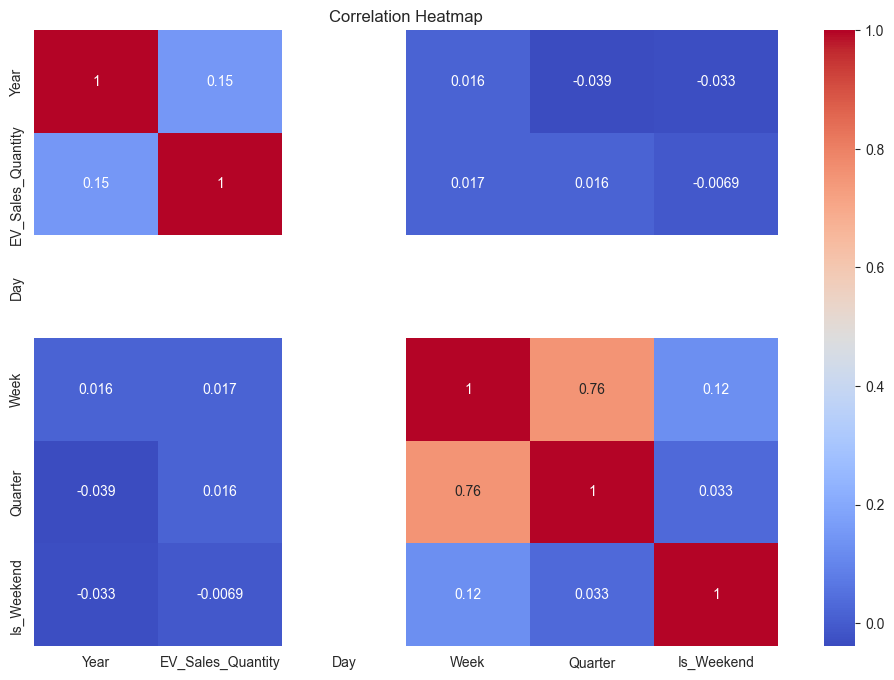

In [222]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [223]:
print(df.columns)

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity', 'Day', 'Week',
       'Quarter', 'Is_Weekend'],
      dtype='object')


What is a Correlation Heatmap?
A correlation heatmap shows how strongly different numerical features in your dataset are related to each other. It uses Pearson’s correlation coefficient, which ranges from:

+1 → Perfect positive correlation (both variables increase together)

0 → No correlation

–1 → Perfect negative correlation (one increases, the other decreases)


Somewhere in your DataFrame, one or more columns (possibly Day) contain constant values or very little variation, which results in undefined correlations (NaNs).

Heatmaps don't color NaN cells → those cells remain white.



In [225]:
print(df.dtypes)
print(df.head())


Year                          int64
Month_Name                 category
Date                 datetime64[ns]
State                      category
Vehicle_Class              category
Vehicle_Category           category
Vehicle_Type               category
EV_Sales_Quantity             int64
Day                           int32
Week                         UInt32
Quarter                       int32
Is_Weekend                     bool
dtype: object
    Year Month_Name       Date           State    Vehicle_Class  \
Id                                                                
1   2014        Jan 2014-01-01  Andhra Pradesh  M-CYCLE/SCOOTER   
2   2014        Jan 2014-01-01    Chhattisgarh  M-CYCLE/SCOOTER   
3   2014        Jan 2014-01-01           Delhi  M-CYCLE/SCOOTER   
4   2014        Jan 2014-01-01           Delhi        MOTOR CAR   
5   2014        Jan 2014-01-01             Goa        MOTOR CAR   

   Vehicle_Category Vehicle_Type  EV_Sales_Quantity  Day  Week  Quarter  \
Id       

In [226]:
# One-hot encode the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'Month_Name',
    'State',
    'Vehicle_Class',
    'Vehicle_Category',
    'Vehicle_Type'
], drop_first=False)  # keep all columns

# Drop the original 'Date' column if not needed for modeling
df_encoded.drop('Date', axis=1, inplace=True)

# Now check types
print(df_encoded.dtypes)

# Now your dataset is ready — everything will be numeric


Year                                int64
EV_Sales_Quantity                   int64
Day                                 int32
Week                               UInt32
Quarter                             int32
                                    ...  
Vehicle_Type_3W_Shared_LowSpeed      bool
Vehicle_Type_4W_Personal             bool
Vehicle_Type_4W_Shared               bool
Vehicle_Type_Bus                     bool
Vehicle_Type_Others                  bool
Length: 114, dtype: object


In [227]:
print(df_encoded.isnull().sum().sum())


0


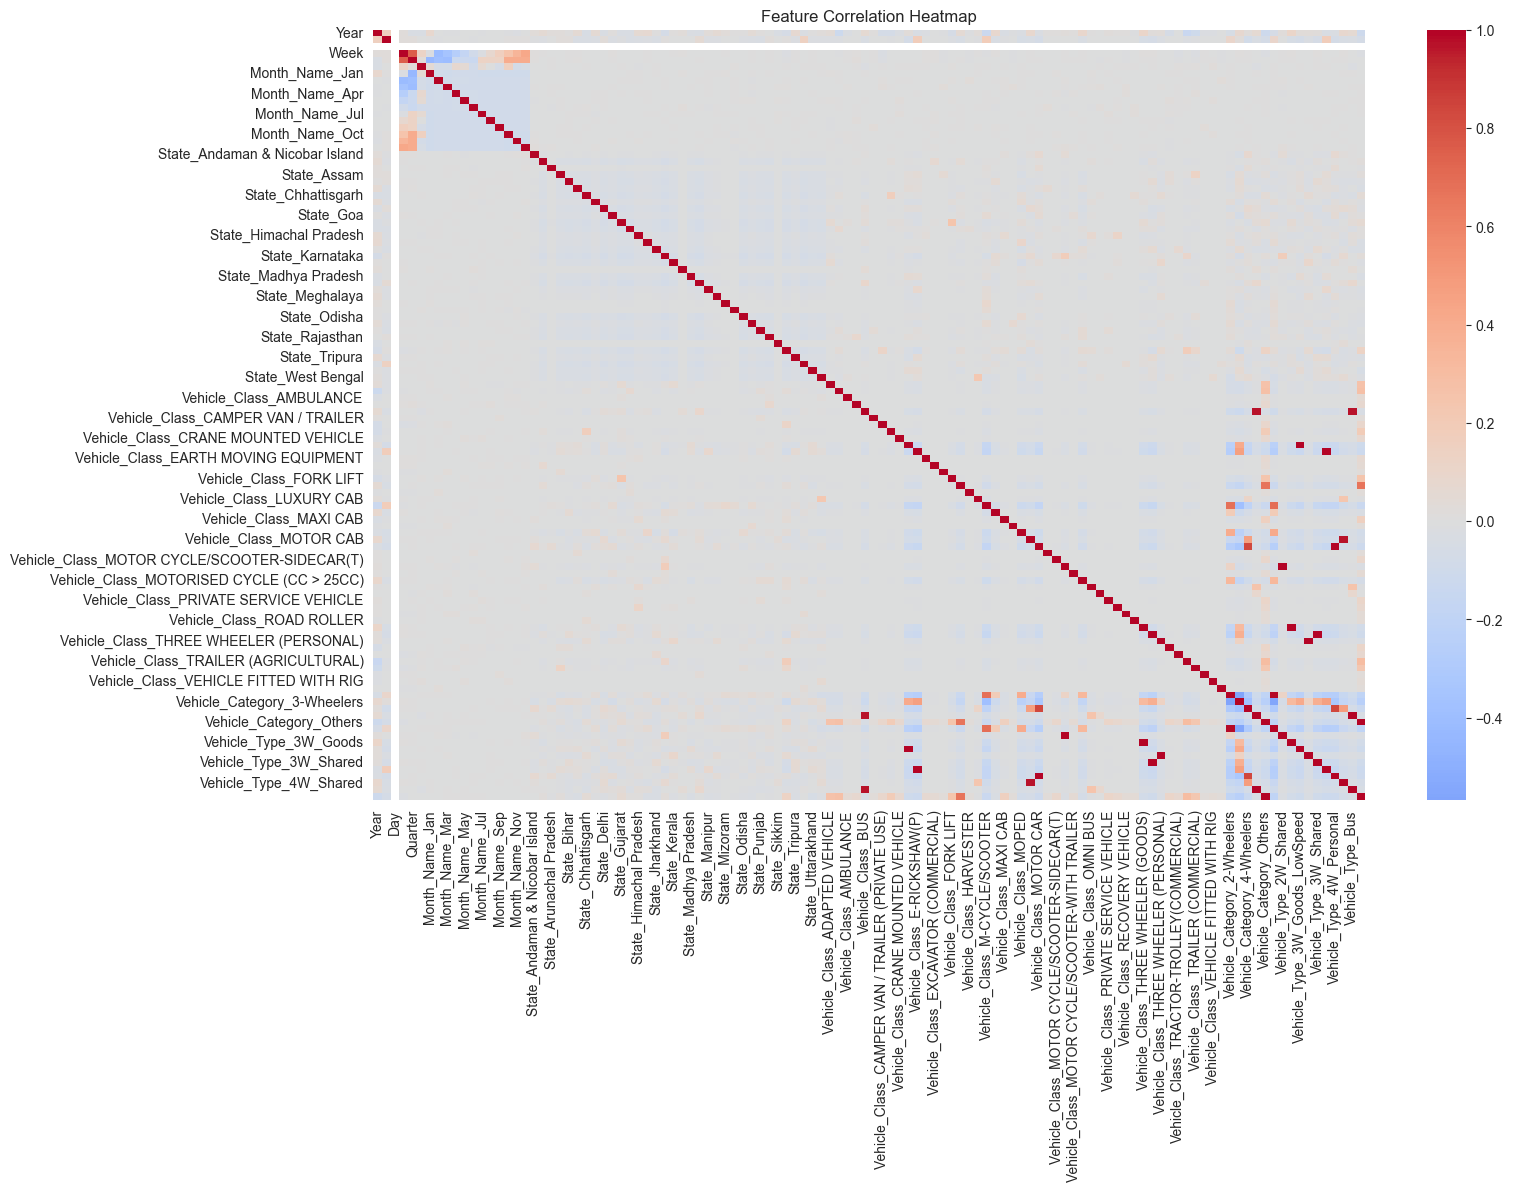

In [228]:
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# Training and Testing

In [230]:
from sklearn.model_selection import train_test_split

# Step 1: Define Features (X) and Target (y)
X = df_encoded.drop(columns=["EV_Sales_Quantity"])  # Drop target & date column
y = df_encoded["EV_Sales_Quantity"]

# Step 2: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Initialize & train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred = lr_model.predict(X_test)


In [232]:
# Step 3: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 4: Print the results
print(f"Linear Regression Performance:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Linear Regression Performance:
MAE  = 420.27
MSE  = 842698.81
RMSE = 917.99
R²   = 0.17


In [234]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [235]:
# Step 3: Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 4: Print the results
print("Random Forest Performance:")
print(f"MAE  = {mae_rf:.2f}")
print(f"MSE  = {mse_rf:.2f}")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R²   = {r2_rf:.2f}")


Random Forest Performance:
MAE  = 57.16
MSE  = 43122.26
RMSE = 207.66
R²   = 0.96


Linear Regression was too simple and couldn't capture the complexity of your EV sales data.

Random Forest performed exceptionally well, indicating that: Non-linear patterns exist.

The features (like State, Vehicle Class, Date parts) are informative.

Random Forest generalizes well in this case.

In [236]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Initialize & Train
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred_xgb = xgb_model.predict(X_test)

In [237]:
# Step 3: Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

# Step 4: Print Results
print("XGBoost Performance:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

XGBoost Performance:
MAE  = 106.08
MSE  = 77101.66
RMSE = 277.67
R²   = 0.92


**Interpretation:**
Random Forest is the best performing model across all metrics.

XGBoost performed quite well (R² = 0.92), but not better than Random Forest in this case.

Linear Regression clearly underperforms, likely due to non-linearity in the features.

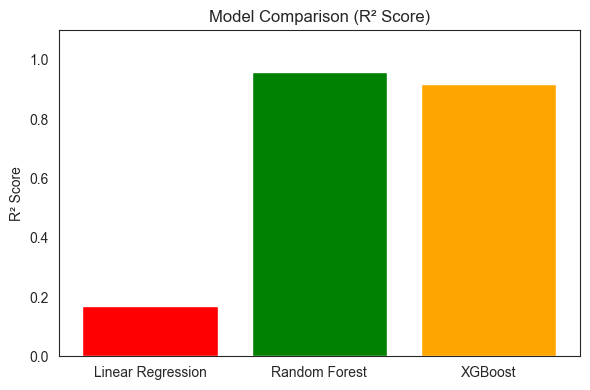

In [244]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [0.17, 0.96, 0.92]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores, color=['red', 'green', 'orange'])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


# Plot Actual vs. Predicted for Test Set

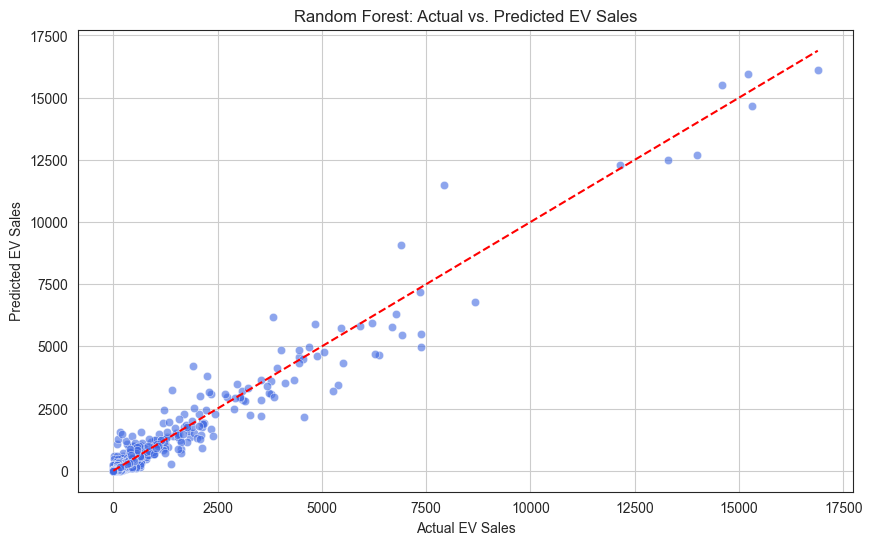

In [239]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Random Forest: Actual vs. Predicted EV Sales")
plt.grid(True)
plt.show()

# Feature Importance (Random Forest)

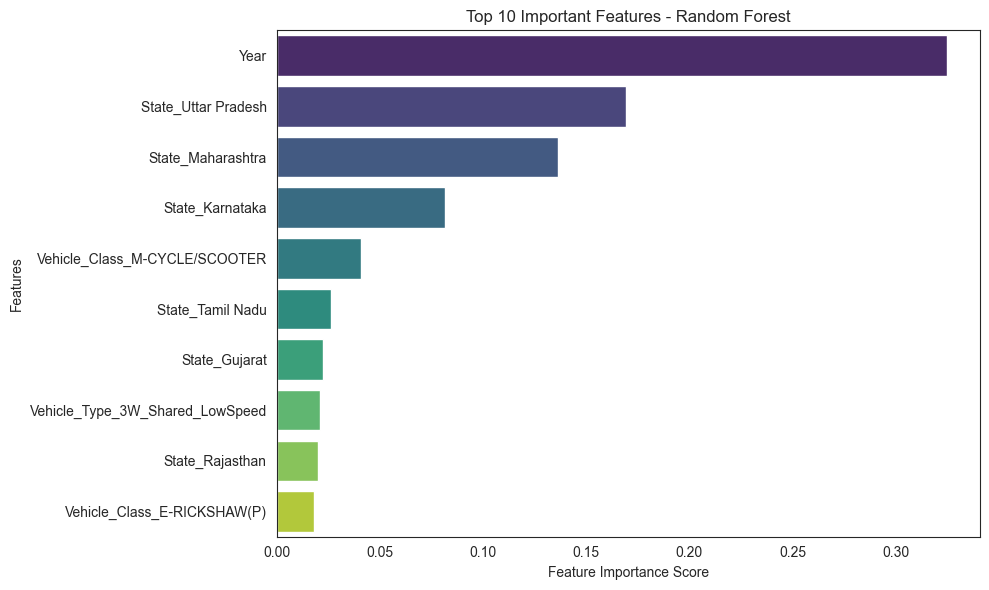

In [240]:
# Plot top 10 most important features
importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# EV Sales Trend Over Time

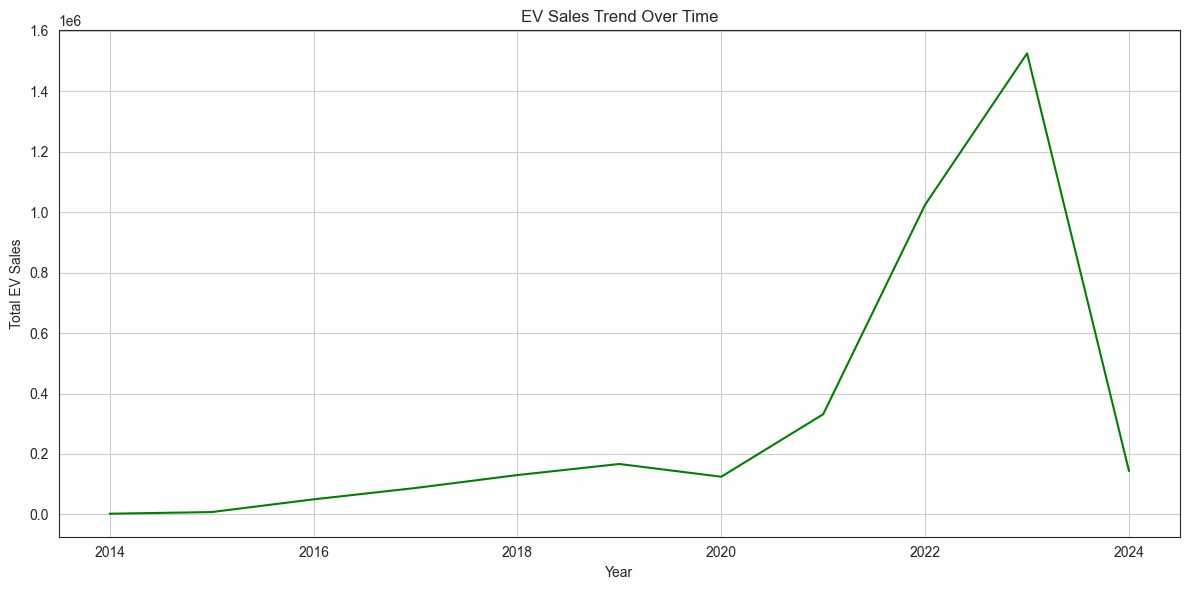

In [243]:
# Group by Date and plot total EV sales
df_grouped = df_encoded.groupby("Year")["EV_Sales_Quantity"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="EV_Sales_Quantity", data=df_grouped, color='green')
plt.title("EV Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The machine learning model helps in understanding the factors affecting Electric Vehicle sales across different states and predicting future sales based on historical data.Feature importance gives insight into which factors(e.g.,State,Vehicle Category) have the highest impact on sales.